In [1]:
import pandas as pd

In [2]:
stock_data=pd.read_csv('https://raw.githubusercontent.com/sunnysavita10/time-series/main/TSLA.CSV')

In [3]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
# for univariate we need only two variables 

In [5]:
stock_data=stock_data[['Date','Close']]

In [6]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [10]:
stock_data = stock_data.set_index("Date")

In [11]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


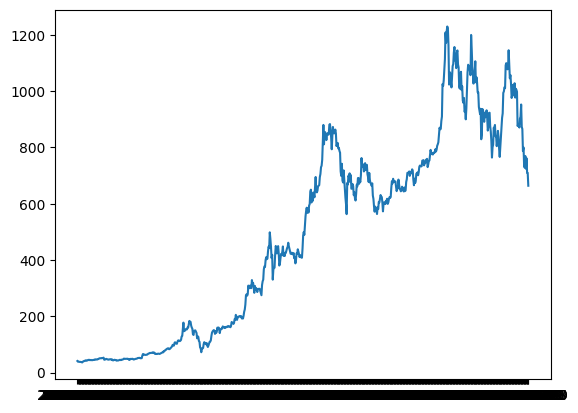

In [12]:
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

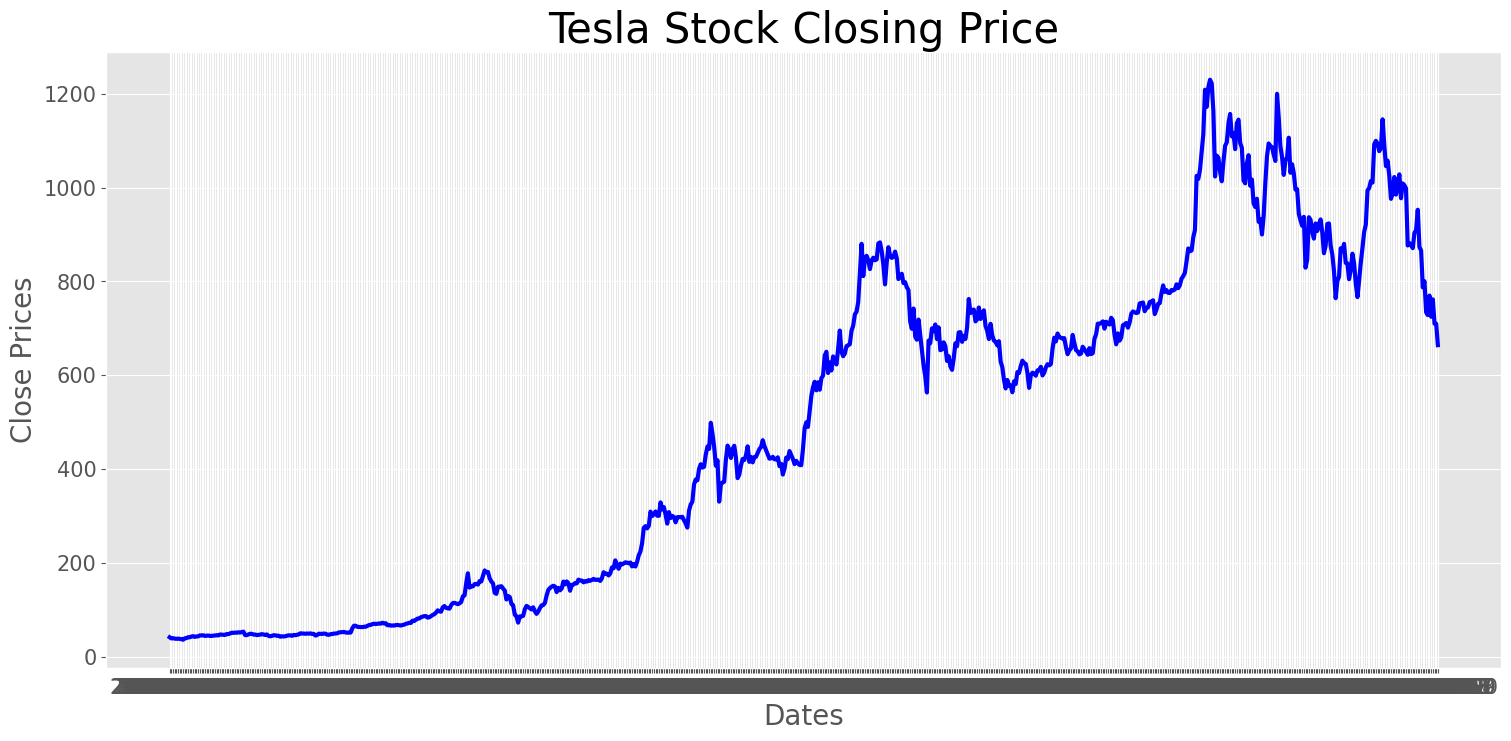

In [13]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_7792\477833349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['Close'])


<AxesSubplot: xlabel='Close', ylabel='Density'>

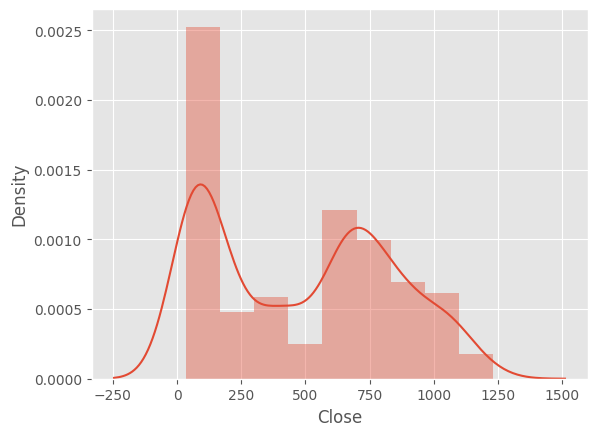

In [14]:
import seaborn as sns
sns.distplot(stock_data['Close'])

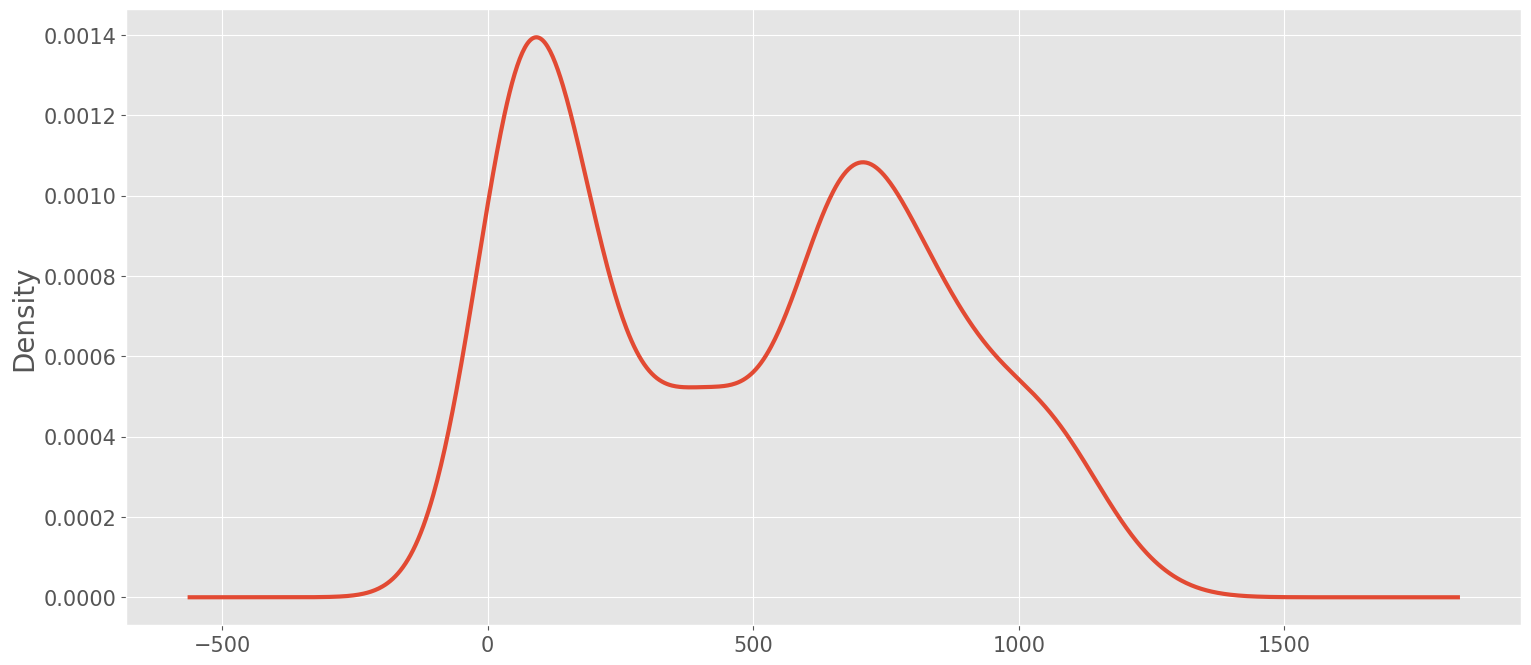

In [15]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
type(stock_data['Close'])

pandas.core.series.Series

In [18]:
import numpy as np
np.mean(stock_data['Close'].head(12))

38.51633358001709

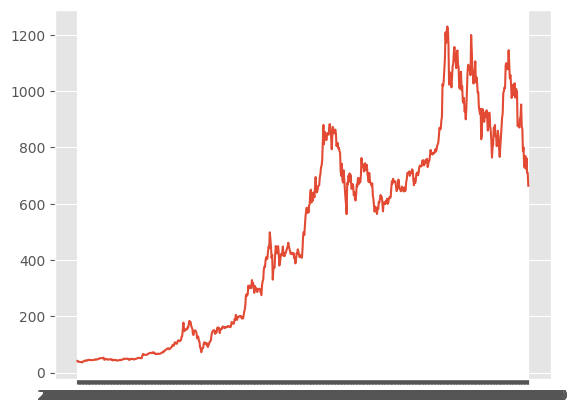

In [19]:
plt.plot(stock_data['Close'])

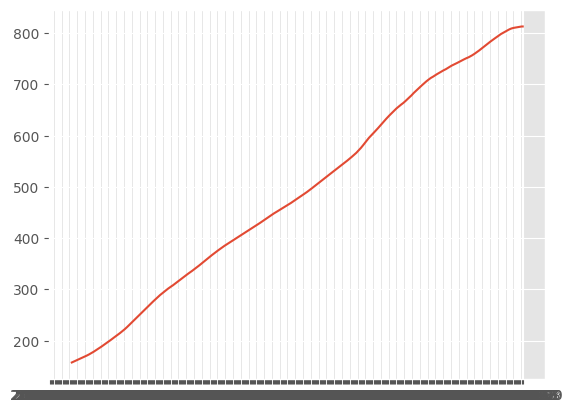

In [20]:
plt.plot(stock_data['Close'].rolling(365).mean())

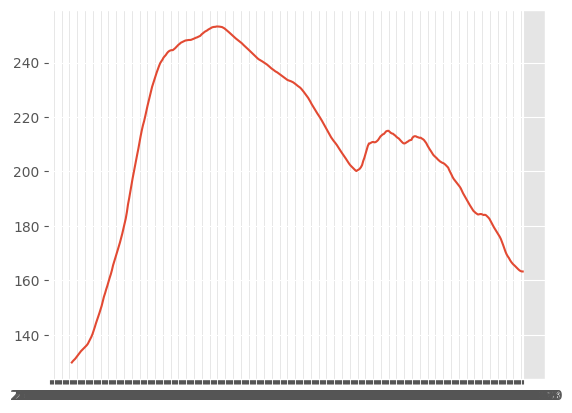

In [21]:
plt.plot(stock_data['Close'].rolling(365).std() )

In [22]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

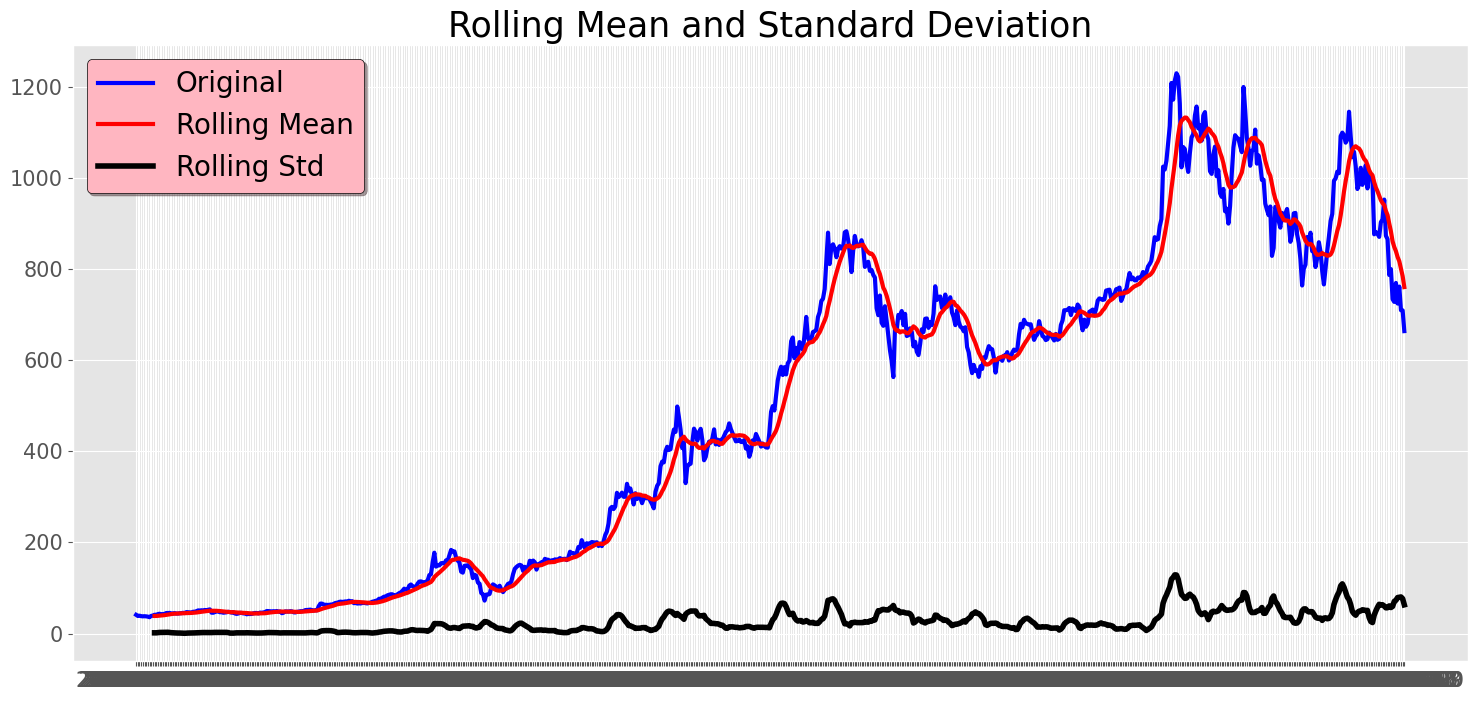

Results of dickey fuller test


NameError: name 'adfuller' is not defined

In [23]:
test_stationarity(stock_data['Close'])

In [24]:
df_close=stock_data['Close']

In [25]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64